**CUSTOM CNN**





In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Define function to preprocess dataset
def preprocess_dataset(folder_path, stage_label, image_size=(100, 100)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"Unable to read image: {img_path}. Skipping...")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            # Remove background (Example: using simple thresholding)
            gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            _, mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)  # Threshold for background separation
            masked_img = cv2.bitwise_and(img, img, mask=mask)
            # Resize image
            img = cv2.resize(masked_img, image_size)
            images.append(img)
            labels.append(stage_label)
        except Exception as e:
            print(f"Error processing image: {img_path}. Skipping... Error: {e}")
            continue
    return images, labels

# Define paths for Stage 1 and Stage 2 folders
stage1_folder = "/content/drive/MyDrive/Stage1"
stage2_folder = "/content/drive/MyDrive/Stage2"

# Preprocess Stage 1 images
stage1_images, stage1_labels = preprocess_dataset(stage1_folder, 0)

# Preprocess Stage 2 images
stage2_images, stage2_labels = preprocess_dataset(stage2_folder, 1)

# Combine images and labels
images = np.array(stage1_images + stage2_images)
labels = np.array(stage1_labels + stage2_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest')

datagen.fit(X_train)

# Define custom CNN model
# Define custom CNN model
model_custom_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_custom_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train custom CNN model
model_custom_cnn.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=10)

# Evaluate custom CNN model
custom_cnn_loss, custom_cnn_accuracy = model_custom_cnn.evaluate(X_test, y_test)

# Store test accuracies of each model
test_accuracies_custom_cnn = [custom_cnn_accuracy] * 10




Epoch 1/10
11/11 [==============================] - 18s 782ms/step - loss: 34.0827 - accuracy: 0.7337
Epoch 2/10
11/11 [==============================] - 6s 543ms/step - loss: 3.3743 - accuracy: 0.8102
Epoch 3/10
11/11 [==============================] - 8s 689ms/step - loss: 1.6358 - accuracy: 0.7734
Epoch 4/10
11/11 [==============================] - 6s 527ms/step - loss: 0.6866 - accuracy: 0.7932
Epoch 5/10
11/11 [==============================] - 6s 531ms/step - loss: 0.6117 - accuracy: 0.7932
Epoch 6/10
11/11 [==============================] - 7s 623ms/step - loss: 0.4324 - accuracy: 0.8499
Epoch 7/10
11/11 [==============================] - 6s 533ms/step - loss: 0.4451 - accuracy: 0.8300
Epoch 8/10
11/11 [==============================] - 6s 535ms/step - loss: 0.4204 - accuracy: 0.8555
Epoch 9/10
11/11 [==============================] - 8s 727ms/step - loss: 0.3748 - accuracy: 0.8555
Epoch 10/10
3/3 [==============================] - 0s 112ms/step - loss: 0.4407 - accuracy: 0.8989

Epoch 1/10
11/11 [==============================] - 8s 693ms/step - loss: 0.2696 - accuracy: 0.8839 - val_loss: 0.5219 - val_accuracy: 0.8202
Epoch 2/10
11/11 [==============================] - 6s 633ms/step - loss: 0.3741 - accuracy: 0.8782 - val_loss: 0.4695 - val_accuracy: 0.8876
Epoch 3/10
11/11 [==============================] - 8s 767ms/step - loss: 0.2838 - accuracy: 0.8924 - val_loss: 0.6327 - val_accuracy: 0.8315
Epoch 4/10
11/11 [==============================] - 7s 587ms/step - loss: 0.4288 - accuracy: 0.8357 - val_loss: 0.3515 - val_accuracy: 0.8764
Epoch 5/10
11/11 [==============================] - 8s 768ms/step - loss: 0.3396 - accuracy: 0.8555 - val_loss: 0.3394 - val_accuracy: 0.8876
Epoch 6/10
11/11 [==============================] - 7s 591ms/step - loss: 0.2714 - accuracy: 0.8754 - val_loss: 0.3497 - val_accuracy: 0.8989
Epoch 7/10
11/11 [==============================] - 6s 567ms/step - loss: 0.2273 - accuracy: 0.9065 - val_loss: 0.3932 - val_accuracy: 0.8989
Epoch 

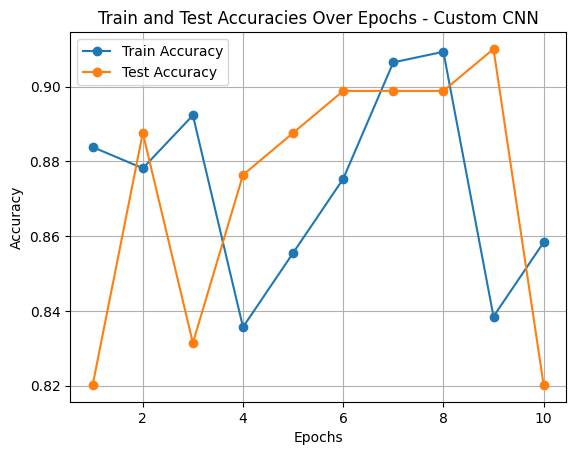

In [ ]:
# Train custom CNN model
custom_cnn_history = model_custom_cnn.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=10, validation_data=(X_test, y_test))

# Store train and test accuracies of each epoch during training
train_accuracies_custom_cnn = custom_cnn_history.history['accuracy']
test_accuracies_custom_cnn = custom_cnn_history.history['val_accuracy']

# Plot the accuracies over epochs for Custom CNN
plt.plot(range(1, 11), train_accuracies_custom_cnn, marker='o', linestyle='-', label='Train Accuracy')
plt.plot(range(1, 11), test_accuracies_custom_cnn, marker='o', linestyle='-', label='Test Accuracy')
plt.title('Train and Test Accuracies Over Epochs - Custom CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


**SINGLE EPOCH METRICS**

3/3 [==============================] - 0s 107ms/step
Accuracy: 0.8202247191011236
Precision: 0.7446808510638298
Recall: 0.8974358974358975
F1 Score: 0.813953488372093
3/3 [==============================] - 0s 106ms/step


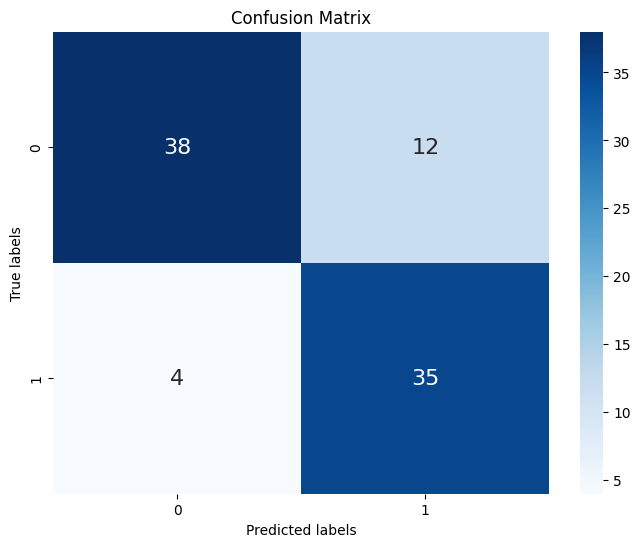

ROC-AUC Score: 0.9446153846153845


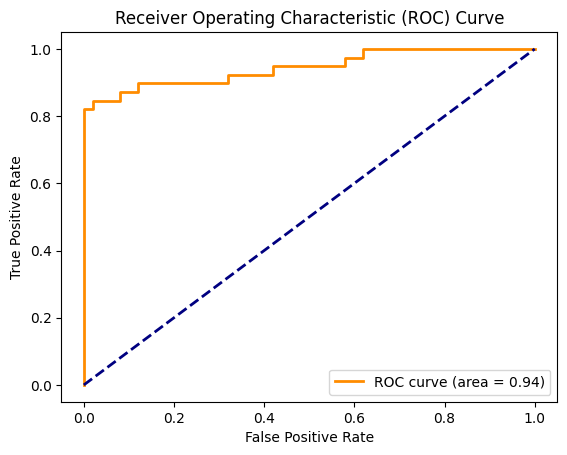

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predicting labels for the test set
y_pred = model_custom_cnn.predict(X_test)
y_pred_binary = np.round(y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_binary)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", f1)

# Confusion Matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting labels for the test set
y_pred = model_custom_cnn.predict(X_test)
y_pred_binary = np.round(y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**METRICS OVER EPOCH**

3/3 [==============================] - 0s 111ms/step


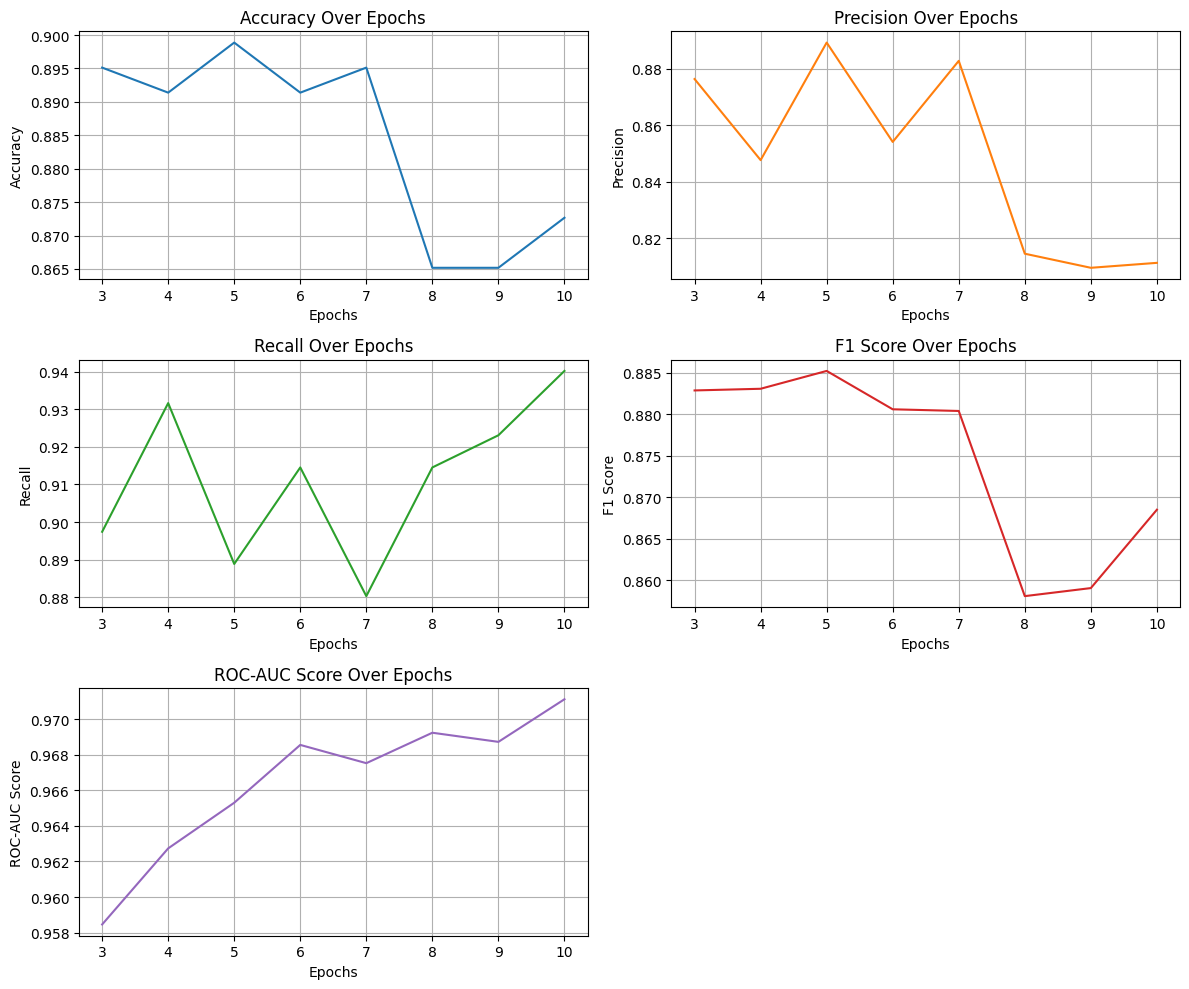

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Lists to store metric values for each epoch
epochs = range(1, 11)
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

for epoch in epochs:
    # Train the model for one epoch
    model_custom_cnn.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=1)

    # Evaluate the model on the test set
    y_pred = model_custom_cnn.predict(X_test)
    y_pred_binary = np.round(y_pred)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Append metric values to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Smooth the curves by averaging values over 3 epochs
smooth_window = 3
smoothed_accuracies = np.convolve(accuracies, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_precisions = np.convolve(precisions, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_recalls = np.convolve(recalls, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_f1_scores = np.convolve(f1_scores, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_roc_auc_scores = np.convolve(roc_auc_scores, np.ones(smooth_window)/smooth_window, mode='valid')

# Plotting the metric values over epochs using subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

axs[0, 0].plot(epochs[smooth_window-1:], smoothed_accuracies, label='Accuracy', color='tab:blue')
axs[0, 0].set_title('Accuracy Over Epochs')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid(True)

axs[0, 1].plot(epochs[smooth_window-1:], smoothed_precisions, label='Precision', color='tab:orange')
axs[0, 1].set_title('Precision Over Epochs')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].grid(True)

axs[1, 0].plot(epochs[smooth_window-1:], smoothed_recalls, label='Recall', color='tab:green')
axs[1, 0].set_title('Recall Over Epochs')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].grid(True)

axs[1, 1].plot(epochs[smooth_window-1:], smoothed_f1_scores, label='F1 Score', color='tab:red')
axs[1, 1].set_title('F1 Score Over Epochs')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].grid(True)

axs[2, 0].plot(epochs[smooth_window-1:], smoothed_roc_auc_scores, label='ROC-AUC Score', color='tab:purple')
axs[2, 0].set_title('ROC-AUC Score Over Epochs')
axs[2, 0].set_xlabel('Epochs')
axs[2, 0].set_ylabel('ROC-AUC Score')
axs[2, 0].grid(True)

# Hide the unused subplot
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


**RESIDUE PLOT**

3/3 [==============================] - 1s 188ms/step


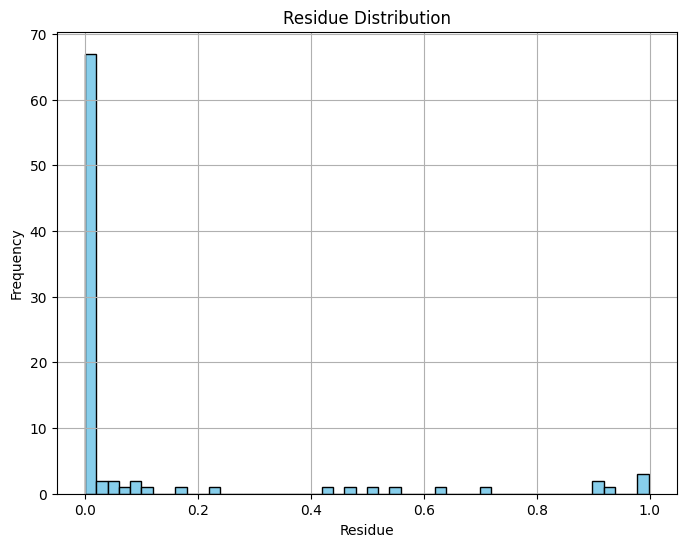

In [ ]:
# Predicting probabilities for the test set
y_pred_prob = model_custom_cnn.predict(X_test)

# Calculate residue (difference between true labels and predicted probabilities)
residue = np.abs(y_test.reshape(-1) - y_pred_prob.reshape(-1))

# Plot residue distribution
plt.figure(figsize=(8, 6))
plt.hist(residue, bins=50, color='skyblue', edgecolor='black')
plt.title('Residue Distribution')
plt.xlabel('Residue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**RESNET50 MODEL**

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define function to preprocess dataset
def preprocess_dataset(folder_path, stage_label, image_size=(224, 224)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"Unable to read image: {img_path}. Skipping...")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            # Resize image
            img = cv2.resize(img, image_size)
            images.append(img)
            labels.append(stage_label)
        except Exception as e:
            print(f"Error processing image: {img_path}. Skipping... Error: {e}")
            continue
    return images, labels

# Define paths for Stage 1 and Stage 2 folders
stage1_folder = "/content/drive/MyDrive/Stage1"
stage2_folder = "/content/drive/MyDrive/Stage2"

# Preprocess Stage 1 images
stage1_images, stage1_labels = preprocess_dataset(stage1_folder, 0)

# Preprocess Stage 2 images
stage2_images, stage2_labels = preprocess_dataset(stage2_folder, 1)

# Combine images and labels
images = np.array(stage1_images + stage2_images)
labels = np.array(stage1_labels + stage2_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest')

datagen.fit(X_train)

# Load pre-trained ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in resnet_model.layers:
    layer.trainable = False

# Add custom layers on top of ResNet50
model_resnet = Sequential([
    resnet_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile ResNet50-based model
model_resnet.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train ResNet50-based model
history_resnet = model_resnet.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=10)

# Evaluate ResNet50-based model
resnet_loss, resnet_accuracy = model_resnet.evaluate(X_test, y_test)

# Store test accuracies of each model
test_accuracies_resnet = [resnet_accuracy] * 10


94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/10
11/11 [==============================] - 15s 400ms/step - loss: 7.5759 - accuracy: 0.7819
Epoch 2/10
11/11 [==============================] - 5s 403ms/step - loss: 0.2611 - accuracy: 0.9773
Epoch 3/10
11/11 [==============================] - 4s 351ms/step - loss: 0.1473 - accuracy: 0.9745
Epoch 4/10
11/11 [==============================] - 4s 391ms/step - loss: 0.2089 - accuracy: 0.9688
Epoch 5/10
11/11 [==============================] - 5s 394ms/step - loss: 0.1175 - accuracy: 0.9773
Epoch 6/10
11/11 [==============================] - 4s 343ms/step - loss: 0.0647 - accuracy: 0.9858
Epoch 7/10
11/11 [==============================] - 5s 474ms/step - loss: 0.0734 - accuracy: 0.9858
Epoch 8/10
11/11 [==============================] - 4s 352ms/step - loss: 0.0715 - accuracy: 0.9830
Epoch 9/10
11/11 [==============================] - 6s 532ms/step - loss: 0.0154 - accuracy: 0.9943
Epoch 10/10
3/3 [=================

Epoch 1/10
11/11 [==============================] - 8s 709ms/step - loss: 0.0287 - accuracy: 0.9972 - val_loss: 0.0731 - val_accuracy: 0.9775
Epoch 2/10
11/11 [==============================] - 11s 954ms/step - loss: 0.0278 - accuracy: 0.9943 - val_loss: 0.0977 - val_accuracy: 0.9888
Epoch 3/10
11/11 [==============================] - 4s 373ms/step - loss: 0.0659 - accuracy: 0.9830 - val_loss: 0.0457 - val_accuracy: 0.9888
Epoch 4/10
11/11 [==============================] - 5s 500ms/step - loss: 0.0896 - accuracy: 0.9887 - val_loss: 0.4416 - val_accuracy: 0.9438
Epoch 5/10
11/11 [==============================] - 4s 429ms/step - loss: 0.0186 - accuracy: 0.9915 - val_loss: 0.2238 - val_accuracy: 0.9888
Epoch 6/10
11/11 [==============================] - 4s 374ms/step - loss: 0.0532 - accuracy: 0.9943 - val_loss: 0.3442 - val_accuracy: 0.9551
Epoch 7/10
11/11 [==============================] - 5s 507ms/step - loss: 0.1872 - accuracy: 0.9745 - val_loss: 0.2551 - val_accuracy: 0.9888
Epoch

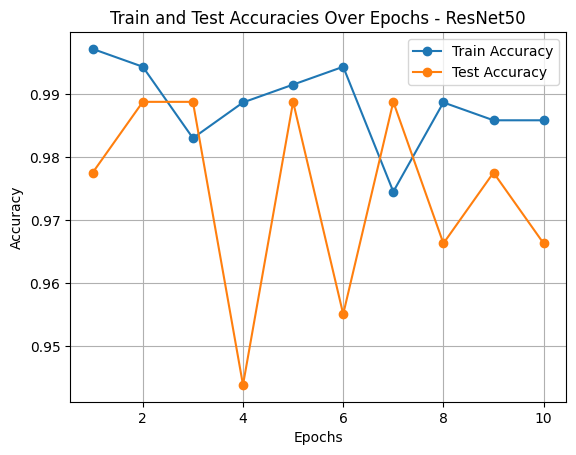

In [ ]:
# Train ResNet50-based model
history_resnet = model_resnet.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=10, validation_data=(X_test, y_test))

# Store train and test accuracies of each epoch during training
train_accuracies_resnet = history_resnet.history['accuracy']
test_accuracies_resnet = history_resnet.history['val_accuracy']

# Plot the accuracies over epochs for ResNet50-based model
plt.plot(range(1, 11), train_accuracies_resnet, marker='o', linestyle='-', label='Train Accuracy')
plt.plot(range(1, 11), test_accuracies_resnet, marker='o', linestyle='-', label='Test Accuracy')
plt.title('Train and Test Accuracies Over Epochs - ResNet50')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


**SINGLE EPOCH METRICS**

3/3 [==============================] - 1s 122ms/step
Accuracy: 0.9662921348314607
Precision: 0.9285714285714286
Recall: 1.0
F1 Score: 0.962962962962963


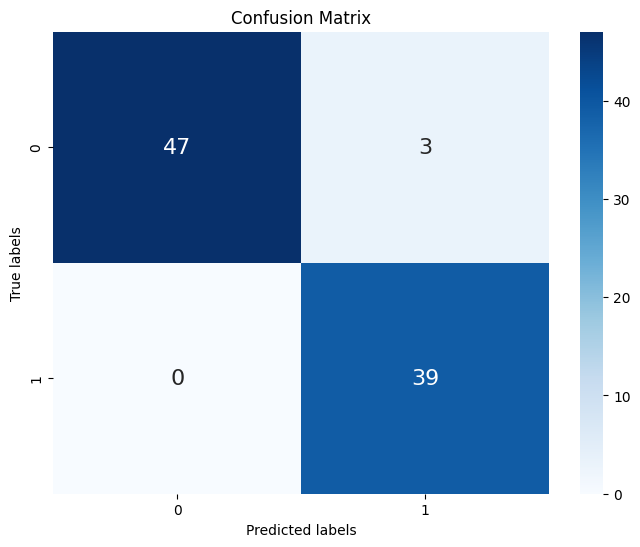

ROC-AUC Score: 0.9994871794871795


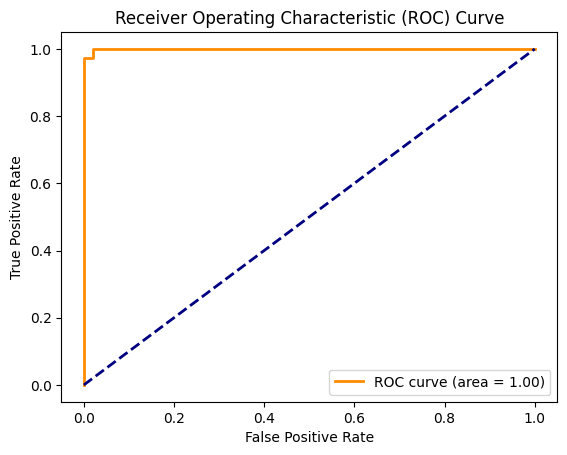

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting labels for the test set
y_pred_resnet = model_resnet.predict(X_test)
y_pred_resnet_binary = np.round(y_pred_resnet)

# Accuracy
accuracy_resnet = accuracy_score(y_test, y_pred_resnet_binary)
print("Accuracy:", accuracy_resnet)

# Precision
precision_resnet = precision_score(y_test, y_pred_resnet_binary)
print("Precision:", precision_resnet)

# Recall
recall_resnet = recall_score(y_test, y_pred_resnet_binary)
print("Recall:", recall_resnet)

# F1 Score
f1_resnet = f1_score(y_test, y_pred_resnet_binary)
print("F1 Score:", f1_resnet)

# Confusion Matrix
cm_resnet = confusion_matrix(y_test, y_pred_resnet_binary)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Score
roc_auc_resnet = roc_auc_score(y_test, y_pred_resnet)
print("ROC-AUC Score:", roc_auc_resnet)

# ROC Curve
fpr_resnet, tpr_resnet, _ = roc_curve(y_test, y_pred_resnet)
plt.figure()
plt.plot(fpr_resnet, tpr_resnet, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_resnet)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**METRICS OVER EPOCHS**

3/3 [==============================] - 0s 87ms/step


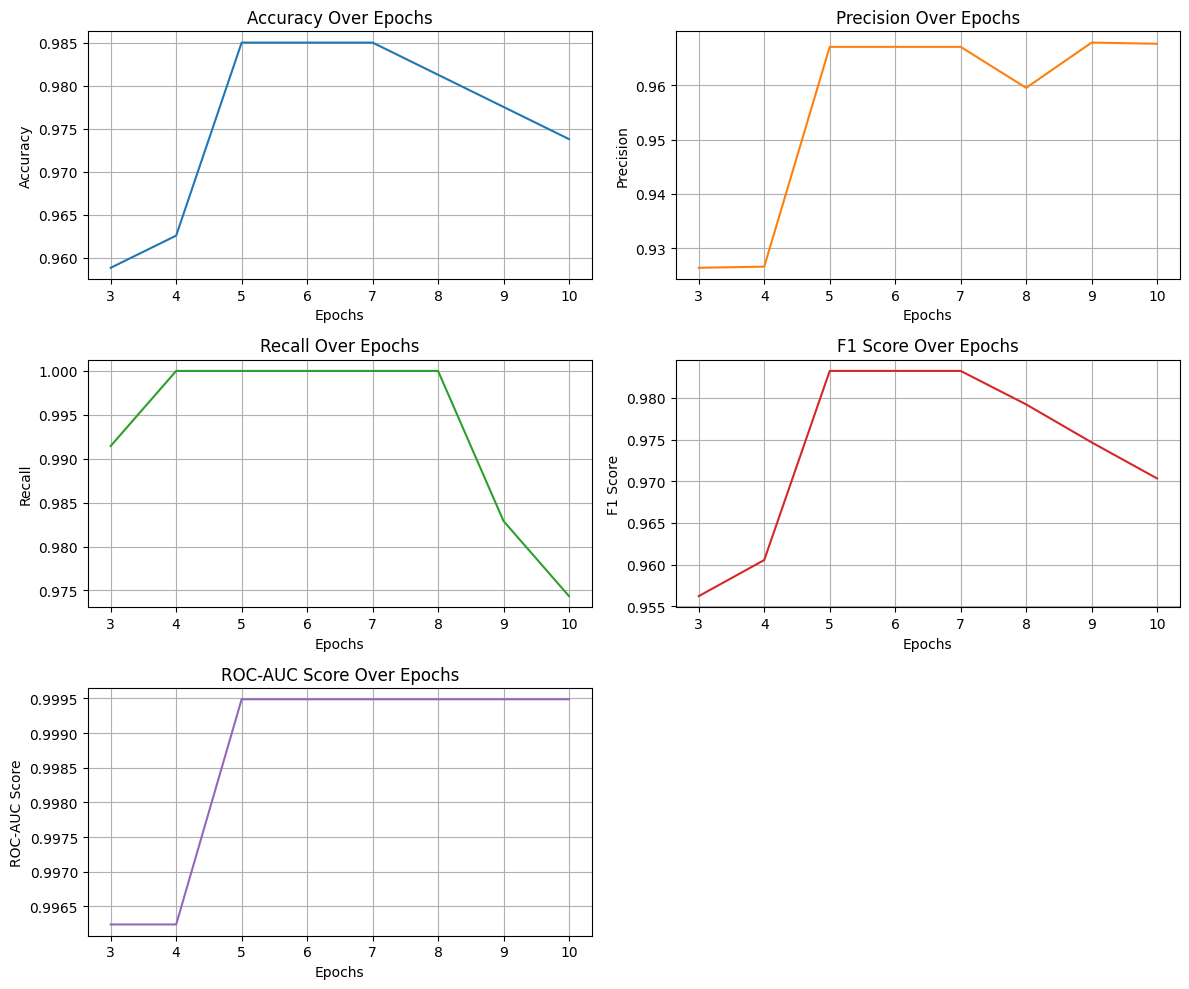

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Lists to store metric values for each epoch
epochs = range(1, 11)
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

for epoch in epochs:
    # Train the model for one epoch
    history_resnet = model_resnet.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=1, validation_data=(X_test, y_test))

    # Evaluate the model on the test set
    resnet_loss, resnet_accuracy = model_resnet.evaluate(X_test, y_test)
    y_pred_resnet = model_resnet.predict(X_test)
    y_pred_resnet_binary = np.round(y_pred_resnet)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_resnet_binary)
    precision = precision_score(y_test, y_pred_resnet_binary)
    recall = recall_score(y_test, y_pred_resnet_binary)
    f1 = f1_score(y_test, y_pred_resnet_binary)
    roc_auc = roc_auc_score(y_test, y_pred_resnet)

    # Append metric values to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Smooth the curves by averaging values over 3 epochs
smooth_window = 3
smoothed_accuracies = np.convolve(accuracies, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_precisions = np.convolve(precisions, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_recalls = np.convolve(recalls, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_f1_scores = np.convolve(f1_scores, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_roc_auc_scores = np.convolve(roc_auc_scores, np.ones(smooth_window)/smooth_window, mode='valid')

# Plotting the metric values over epochs using subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

axs[0, 0].plot(epochs[smooth_window-1:], smoothed_accuracies, label='Accuracy', color='tab:blue')
axs[0, 0].set_title('Accuracy Over Epochs')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid(True)

axs[0, 1].plot(epochs[smooth_window-1:], smoothed_precisions, label='Precision', color='tab:orange')
axs[0, 1].set_title('Precision Over Epochs')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].grid(True)

axs[1, 0].plot(epochs[smooth_window-1:], smoothed_recalls, label='Recall', color='tab:green')
axs[1, 0].set_title('Recall Over Epochs')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].grid(True)

axs[1, 1].plot(epochs[smooth_window-1:], smoothed_f1_scores, label='F1 Score', color='tab:red')
axs[1, 1].set_title('F1 Score Over Epochs')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].grid(True)

axs[2, 0].plot(epochs[smooth_window-1:], smoothed_roc_auc_scores, label='ROC-AUC Score', color='tab:purple')
axs[2, 0].set_title('ROC-AUC Score Over Epochs')
axs[2, 0].set_xlabel('Epochs')
axs[2, 0].set_ylabel('ROC-AUC Score')
axs[2, 0].grid(True)

# Hide the unused subplot
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


**RESIDUE PLOTS**

In [ ]:
# Predicting probabilities for the test set
y_pred_prob_resnet = model_resnet.predict(X_test)

# Calculate residue (difference between true labels and predicted probabilities)
residue_resnet = np.abs(y_test.reshape(-1) - y_pred_prob_resnet.reshape(-1))

# Plot residue distribution
plt.figure(figsize=(8, 6))
plt.hist(residue_resnet, bins=50, color='skyblue', edgecolor='black')
plt.title('Residue Distribution (ResNet50)')
plt.xlabel('Residue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**VGG16 MODEL**

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define function to preprocess dataset
def preprocess_dataset(folder_path, stage_label, image_size=(224, 224)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"Unable to read image: {img_path}. Skipping...")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            # Resize image
            img = cv2.resize(img, image_size)
            images.append(img)
            labels.append(stage_label)
        except Exception as e:
            print(f"Error processing image: {img_path}. Skipping... Error: {e}")
            continue
    return images, labels

# Define paths for Stage 1 and Stage 2 folders
stage1_folder = "/content/drive/MyDrive/Stage1"
stage2_folder = "/content/drive/MyDrive/Stage2"

# Preprocess Stage 1 images
stage1_images, stage1_labels = preprocess_dataset(stage1_folder, 0)

# Preprocess Stage 2 images
stage2_images, stage2_labels = preprocess_dataset(stage2_folder, 1)

# Combine images and labels
images = np.array(stage1_images + stage2_images)
labels = np.array(stage1_labels + stage2_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest')

datagen.fit(X_train)

# Load pre-trained VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in vgg16_model.layers:
    layer.trainable = False

# Add custom layers on top of VGG16
model_vgg16 = Sequential([
    vgg16_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile VGG16-based model
model_vgg16.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train VGG16-based model
history_vgg16 = model_vgg16.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=10)

# Evaluate VGG16-based model
vgg16_loss, vgg16_accuracy = model_vgg16.evaluate(X_test, y_test)

# Store test accuracies of each model
test_accuracies_vgg16 = [vgg16_accuracy] * 10


In [ ]:
# Train VGG16-based model
history_vgg16 = model_vgg16.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=10, validation_data=(X_test, y_test))

# Store train and test accuracies of each epoch during training
train_accuracies_vgg16 = history_vgg16.history['accuracy']
test_accuracies_vgg16 = history_vgg16.history['val_accuracy']

# Plot the accuracies over epochs for VGG16-based model
plt.plot(range(1, 11), train_accuracies_vgg16, marker='o', linestyle='-', label='Train Accuracy')
plt.plot(range(1, 11), test_accuracies_vgg16, marker='o', linestyle='-', label='Test Accuracy')
plt.title('Train and Test Accuracies Over Epochs - VGG16')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


**SINGLE EPOCH METRICS**

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting labels for the test set
y_pred_resnet = model_resnet.predict(X_test)
y_pred_resnet_binary = np.round(y_pred_resnet)

# Accuracy
accuracy_resnet = accuracy_score(y_test, y_pred_resnet_binary)
print("Accuracy:", accuracy_resnet)

# Precision
precision_resnet = precision_score(y_test, y_pred_resnet_binary)
print("Precision:", precision_resnet)

# Recall
recall_resnet = recall_score(y_test, y_pred_resnet_binary)
print("Recall:", recall_resnet)

# F1 Score
f1_resnet = f1_score(y_test, y_pred_resnet_binary)
print("F1 Score:", f1_resnet)

# Confusion Matrix
cm_resnet = confusion_matrix(y_test, y_pred_resnet_binary)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Score
roc_auc_resnet = roc_auc_score(y_test, y_pred_resnet)
print("ROC-AUC Score:", roc_auc_resnet)

# ROC Curve
fpr_resnet, tpr_resnet, _ = roc_curve(y_test, y_pred_resnet)
plt.figure()
plt.plot(fpr_resnet, tpr_resnet, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_resnet)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**METRICS OVER EPOCH**

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Lists to store metric values for each epoch
epochs = range(1, 11)
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

for epoch in epochs:
    # Train the model for one epoch
    history_vgg16 = model_vgg16.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=1, validation_data=(X_test, y_test))

    # Evaluate the model on the test set
    vgg16_loss, vgg16_accuracy = model_vgg16.evaluate(X_test, y_test)
    y_pred_vgg16 = model_vgg16.predict(X_test)
    y_pred_vgg16_binary = np.round(y_pred_vgg16)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_vgg16_binary)
    precision = precision_score(y_test, y_pred_vgg16_binary)
    recall = recall_score(y_test, y_pred_vgg16_binary)
    f1 = f1_score(y_test, y_pred_vgg16_binary)
    roc_auc = roc_auc_score(y_test, y_pred_vgg16)

    # Append metric values to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Smooth the curves by averaging values over 3 epochs
smooth_window = 3
smoothed_accuracies = np.convolve(accuracies, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_precisions = np.convolve(precisions, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_recalls = np.convolve(recalls, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_f1_scores = np.convolve(f1_scores, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_roc_auc_scores = np.convolve(roc_auc_scores, np.ones(smooth_window)/smooth_window, mode='valid')

# Plotting the metric values over epochs using subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

axs[0, 0].plot(epochs[smooth_window-1:], smoothed_accuracies, label='Accuracy', color='tab:blue')
axs[0, 0].set_title('Accuracy Over Epochs')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid(True)

axs[0, 1].plot(epochs[smooth_window-1:], smoothed_precisions, label='Precision', color='tab:orange')
axs[0, 1].set_title('Precision Over Epochs')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].grid(True)

axs[1, 0].plot(epochs[smooth_window-1:], smoothed_recalls, label='Recall', color='tab:green')
axs[1, 0].set_title('Recall Over Epochs')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].grid(True)

axs[1, 1].plot(epochs[smooth_window-1:], smoothed_f1_scores, label='F1 Score', color='tab:red')
axs[1, 1].set_title('F1 Score Over Epochs')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].grid(True)

axs[2, 0].plot(epochs[smooth_window-1:], smoothed_roc_auc_scores, label='ROC-AUC Score', color='tab:purple')
axs[2, 0].set_title('ROC-AUC Score Over Epochs')
axs[2, 0].set_xlabel('Epochs')
axs[2, 0].set_ylabel('ROC-AUC Score')
axs[2, 0].grid(True)

# Hide the unused subplot
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


**RESIDUE PLOT**

In [ ]:
# Predicting probabilities for the test set
y_pred_prob_vgg16 = model_vgg16.predict(X_test)

# Calculate residue (difference between true labels and predicted probabilities)
residue_vgg16 = np.abs(y_test.reshape(-1) - y_pred_prob_vgg16.reshape(-1))

# Plot residue distribution
plt.figure(figsize=(8, 6))
plt.hist(residue_vgg16, bins=50, color='skyblue', edgecolor='black')
plt.title('Residue Distribution (VGG16)')
plt.xlabel('Residue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**INCEPTIONV3 MODEL**

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications import InceptionV3
import matplotlib.pyplot as plt

# Define function to preprocess dataset
def preprocess_dataset(folder_path, stage_label, image_size=(299, 299)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"Unable to read image: {img_path}. Skipping...")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img = cv2.resize(img, image_size)  # Resize image
            images.append(img)
            labels.append(stage_label)
        except Exception as e:
            print(f"Error processing image: {img_path}. Skipping... Error: {e}")
            continue
    return images, labels

# Define paths for Stage 1 and Stage 2 folders
stage1_folder = "/content/drive/MyDrive/Stage1"
stage2_folder = "/content/drive/MyDrive/Stage2"

# Preprocess Stage 1 images
stage1_images, stage1_labels = preprocess_dataset(stage1_folder, 0)

# Preprocess Stage 2 images
stage2_images, stage2_labels = preprocess_dataset(stage2_folder, 1)

# Combine images and labels
images = np.array(stage1_images + stage2_images)
labels = np.array(stage1_labels + stage2_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest')

datagen.fit(X_train)

# Define InceptionV3 model
base_model_inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
model_inceptionv3 = Sequential([
    base_model_inceptionv3,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_inceptionv3.layers[0].trainable = False
model_inceptionv3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train InceptionV3 model
model_inceptionv3.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=10)

# Evaluate InceptionV3 model
inceptionv3_loss, inceptionv3_accuracy = model_inceptionv3.evaluate(X_test, y_test)

# Store test accuracies of each model
test_accuracies_inceptionv3 = [inceptionv3_accuracy] * 10



In [ ]:
# Train InceptionV3 model
inceptionv3_history = model_inceptionv3.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=10, validation_data=(X_test, y_test))

# Store train and test accuracies of each epoch during training
train_accuracies_inceptionv3 = inceptionv3_history.history['accuracy']
test_accuracies_inceptionv3 = inceptionv3_history.history['val_accuracy']

# Plot the accuracies over epochs for InceptionV3
plt.plot(range(1, 11), train_accuracies_inceptionv3, marker='o', linestyle='-', label='Train Accuracy')
plt.plot(range(1, 11), test_accuracies_inceptionv3, marker='o', linestyle='-', label='Test Accuracy')
plt.title('Train and Test Accuracies Over Epochs - InceptionV3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


**SINGLE EPOCH METRICS**

In [ ]:
# Predicting labels for the test set
y_pred_inceptionv3 = model_inceptionv3.predict(X_test)
y_pred_binary_inceptionv3 = np.round(y_pred_inceptionv3)

# Accuracy
accuracy_inceptionv3 = accuracy_score(y_test, y_pred_binary_inceptionv3)
print("Accuracy:", accuracy_inceptionv3)

# Precision
precision_inceptionv3 = precision_score(y_test, y_pred_binary_inceptionv3)
print("Precision:", precision_inceptionv3)

# Recall
recall_inceptionv3 = recall_score(y_test, y_pred_binary_inceptionv3)
print("Recall:", recall_inceptionv3)

# F1 Score
f1_inceptionv3 = f1_score(y_test, y_pred_binary_inceptionv3)
print("F1 Score:", f1_inceptionv3)

# Confusion Matrix
cm_inceptionv3 = confusion_matrix(y_test, y_pred_binary_inceptionv3)
print("Confusion Matrix:")
print(cm_inceptionv3)

# ROC-AUC Score
roc_auc_inceptionv3 = roc_auc_score(y_test, y_pred_inceptionv3)
print("ROC-AUC Score:", roc_auc_inceptionv3)

# ROC Curve
fpr_inceptionv3, tpr_inceptionv3, _ = roc_curve(y_test, y_pred_inceptionv3)
plt.figure()
plt.plot(fpr_inceptionv3, tpr_inceptionv3, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_inceptionv3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - InceptionV3')
plt.legend(loc="lower right")
plt.show()


**METRICS OVER EPOCH**

In [ ]:
# Predicting labels for the test set
y_pred_inceptionv3 = model_inceptionv3.predict(X_test)
y_pred_binary_inceptionv3 = np.round(y_pred_inceptionv3)

# Accuracy
accuracy_inceptionv3 = accuracy_score(y_test, y_pred_binary_inceptionv3)
print("Accuracy:", accuracy_inceptionv3)

# Precision
precision_inceptionv3 = precision_score(y_test, y_pred_binary_inceptionv3)
print("Precision:", precision_inceptionv3)

# Recall
recall_inceptionv3 = recall_score(y_test, y_pred_binary_inceptionv3)
print("Recall:", recall_inceptionv3)

# F1 Score
f1_inceptionv3 = f1_score(y_test, y_pred_binary_inceptionv3)
print("F1 Score:", f1_inceptionv3)

# Confusion Matrix
cm_inceptionv3 = confusion_matrix(y_test, y_pred_binary_inceptionv3)
print("Confusion Matrix:")
print(cm_inceptionv3)

# ROC-AUC Score
roc_auc_inceptionv3 = roc_auc_score(y_test, y_pred_inceptionv3)
print("ROC-AUC Score:", roc_auc_inceptionv3)

# ROC Curve
fpr_inceptionv3, tpr_inceptionv3, _ = roc_curve(y_test, y_pred_inceptionv3)
plt.figure()
plt.plot(fpr_inceptionv3, tpr_inceptionv3, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_inceptionv3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - InceptionV3')
plt.legend(loc="lower right")
plt.show()


**RESIDUAL PLOT**

In [ ]:
# Predicting probabilities for the test set
y_pred_prob_inceptionv3 = model_inceptionv3.predict(X_test)

# Calculate residue (difference between true labels and predicted probabilities)
residue_inceptionv3 = np.abs(y_test.reshape(-1) - y_pred_prob_inceptionv3.reshape(-1))

# Plot residue distribution
plt.figure(figsize=(8, 6))
plt.hist(residue_inceptionv3, bins=50, color='skyblue', edgecolor='black')
plt.title('Residue Distribution - InceptionV3')
plt.xlabel('Residue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**MOBILENETV2 MODEL**

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications import MobileNetV2
import matplotlib.pyplot as plt

# Define function to preprocess dataset
def preprocess_dataset(folder_path, stage_label, image_size=(224, 224)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"Unable to read image: {img_path}. Skipping...")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img = cv2.resize(img, image_size)  # Resize image
            images.append(img)
            labels.append(stage_label)
        except Exception as e:
            print(f"Error processing image: {img_path}. Skipping... Error: {e}")
            continue
    return images, labels

# Define paths for Stage 1 and Stage 2 folders
stage1_folder = "/content/drive/MyDrive/Stage1"
stage2_folder = "/content/drive/MyDrive/Stage2"

# Preprocess Stage 1 images
stage1_images, stage1_labels = preprocess_dataset(stage1_folder, 0)

# Preprocess Stage 2 images
stage2_images, stage2_labels = preprocess_dataset(stage2_folder, 1)

# Combine images and labels
images = np.array(stage1_images + stage2_images)
labels = np.array(stage1_labels + stage2_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest')

datagen.fit(X_train)

# Define MobileNetV2 model
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False)
model_mobilenetv2 = Sequential([
    base_model_mobilenetv2,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_mobilenetv2.layers[0].trainable = False

# Train MobileNetV2 model
model_mobilenetv2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_mobilenetv2.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=10)
mobilenetv2_loss, mobilenetv2_accuracy = model_mobilenetv2.evaluate(X_test, y_test)

# Store test accuracies of each model
test_accuracies_mobilenetv2 = [mobilenetv2_accuracy] * 10



**SINGLE EPOCH METRICS**

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predicting labels for the test set
y_pred_mobilenetv2 = model_mobilenetv2.predict(X_test)
y_pred_mobilenetv2_binary = np.round(y_pred_mobilenetv2)

# Accuracy
accuracy_mobilenetv2 = accuracy_score(y_test, y_pred_mobilenetv2_binary)
print("Accuracy (MobileNetV2):", accuracy_mobilenetv2)

# Precision
precision_mobilenetv2 = precision_score(y_test, y_pred_mobilenetv2_binary)
print("Precision (MobileNetV2):", precision_mobilenetv2)

# Recall
recall_mobilenetv2 = recall_score(y_test, y_pred_mobilenetv2_binary)
print("Recall (MobileNetV2):", recall_mobilenetv2)

# F1 Score
f1_mobilenetv2 = f1_score(y_test, y_pred_mobilenetv2_binary)
print("F1 Score (MobileNetV2):", f1_mobilenetv2)

# Confusion Matrix
cm_mobilenetv2 = confusion_matrix(y_test, y_pred_mobilenetv2_binary)
print("Confusion Matrix (MobileNetV2):")
print(cm_mobilenetv2)

# ROC-AUC Score
roc_auc_mobilenetv2 = roc_auc_score(y_test, y_pred_mobilenetv2)
print("ROC-AUC Score (MobileNetV2):", roc_auc_mobilenetv2)

# ROC Curve
fpr_mobilenetv2, tpr_mobilenetv2, _ = roc_curve(y_test, y_pred_mobilenetv2)
plt.figure()
plt.plot(fpr_mobilenetv2, tpr_mobilenetv2, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_mobilenetv2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (MobileNetV2)')
plt.legend(loc="lower right")
plt.show()


**METRICS OVER EPOCH**

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Lists to store metric values for each epoch
epochs = range(1, 11)
accuracies_mobilenetv2 = []
precisions_mobilenetv2 = []
recalls_mobilenetv2 = []
f1_scores_mobilenetv2 = []
roc_auc_scores_mobilenetv2 = []

for epoch in epochs:
    # Train the MobileNetV2 model for one epoch
    model_mobilenetv2.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=1)

    # Evaluate the MobileNetV2 model on the test set
    y_pred_mobilenetv2 = model_mobilenetv2.predict(X_test)
    y_pred_mobilenetv2_binary = np.round(y_pred_mobilenetv2)

    # Calculate evaluation metrics for the MobileNetV2 model
    accuracy_mobilenetv2 = accuracy_score(y_test, y_pred_mobilenetv2_binary)
    precision_mobilenetv2 = precision_score(y_test, y_pred_mobilenetv2_binary)
    recall_mobilenetv2 = recall_score(y_test, y_pred_mobilenetv2_binary)
    f1_mobilenetv2 = f1_score(y_test, y_pred_mobilenetv2_binary)
    roc_auc_mobilenetv2 = roc_auc_score(y_test, y_pred_mobilenetv2)

    # Append metric values to the lists for the MobileNetV2 model
    accuracies_mobilenetv2.append(accuracy_mobilenetv2)
    precisions_mobilenetv2.append(precision_mobilenetv2)
    recalls_mobilenetv2.append(recall_mobilenetv2)
    f1_scores_mobilenetv2.append(f1_mobilenetv2)
    roc_auc_scores_mobilenetv2.append(roc_auc_mobilenetv2)

# Smooth the curves by averaging values over 3 epochs
smooth_window = 3
smoothed_accuracies_mobilenetv2 = np.convolve(accuracies_mobilenetv2, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_precisions_mobilenetv2 = np.convolve(precisions_mobilenetv2, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_recalls_mobilenetv2 = np.convolve(recalls_mobilenetv2, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_f1_scores_mobilenetv2 = np.convolve(f1_scores_mobilenetv2, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_roc_auc_scores_mobilenetv2 = np.convolve(roc_auc_scores_mobilenetv2, np.ones(smooth_window)/smooth_window, mode='valid')

# Plotting the metric values over epochs using subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

axs[0, 0].plot(epochs[smooth_window-1:], smoothed_accuracies_mobilenetv2, label='Accuracy (MobileNetV2)', color='tab:blue')
axs[0, 0].set_title('Accuracy Over Epochs (MobileNetV2)')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid(True)

axs[0, 1].plot(epochs[smooth_window-1:], smoothed_precisions_mobilenetv2, label='Precision (MobileNetV2)', color='tab:orange')
axs[0, 1].set_title('Precision Over Epochs (MobileNetV2)')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].grid(True)

axs[1, 0].plot(epochs[smooth_window-1:], smoothed_recalls_mobilenetv2, label='Recall (MobileNetV2)', color='tab:green')
axs[1, 0].set_title('Recall Over Epochs (MobileNetV2)')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].grid(True)

axs[1, 1].plot(epochs[smooth_window-1:], smoothed_f1_scores_mobilenetv2, label='F1 Score (MobileNetV2)', color='tab:red')
axs[1, 1].set_title('F1 Score Over Epochs (MobileNetV2)')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].grid(True)

axs[2, 0].plot(epochs[smooth_window-1:], smoothed_roc_auc_scores_mobilenetv2, label='ROC-AUC Score (MobileNetV2)', color='tab:purple')
axs[2, 0].set_title('ROC-AUC Score Over Epochs (MobileNetV2)')
axs[2, 0].set_xlabel('Epochs')
axs[2, 0].set_ylabel('ROC-AUC Score')
axs[2, 0].grid(True)

# Hide the unused subplot
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


**RESIDUAL PLOT**

In [ ]:
# Predicting probabilities for the test set
y_pred_prob_mobilenetv2 = model_mobilenetv2.predict(X_test)

# Calculate residue (difference between true labels and predicted probabilities)
residue_mobilenetv2 = np.abs(y_test.reshape(-1) - y_pred_prob_mobilenetv2.reshape(-1))

# Plot residue distribution
plt.figure(figsize=(8, 6))
plt.hist(residue_mobilenetv2, bins=50, color='skyblue', edgecolor='black')
plt.title('Residue Distribution (MobileNetV2)')
plt.xlabel('Residue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**EFFICIENTNETB0 MODEL**

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications import EfficientNetB0  # Import EfficientNetB0

# Step 1: Preprocess the dataset

def preprocess_dataset(folder_path, stage_label, image_size=(224, 224)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
        try:
            img = cv2.imread(filepath)
            if img is None:
                print(f"Unable to read image: {filepath}. Skipping...")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            # Resize image
            img = cv2.resize(img, image_size)
            images.append(img)
            labels.append(stage_label)
        except Exception as e:
            print(f"Error processing image: {filepath}. Skipping... Error: {e}")
            continue
    return images, labels


# Define paths for Stage 1 and Stage 2 folders
stage1_folder = "/content/drive/MyDrive/Stage1"
stage2_folder = "/content/drive/MyDrive/Stage2"

# Preprocess Stage 1 images
stage1_images, stage1_labels = preprocess_dataset(stage1_folder, 0)

# Preprocess Stage 2 images
stage2_images, stage2_labels = preprocess_dataset(stage2_folder, 1)

# Combine images and labels
images = np.array(stage1_images + stage2_images)
labels = np.array(stage1_labels + stage2_labels)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest')

datagen.fit(X_train)

# Step 3: Build and train the deep learning model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Load EfficientNetB0 without top layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.layers[0].trainable = False  # Freeze the pre-trained layers

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=10, validation_data=(X_test, y_test))

# Step 4: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

# Plotting accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


**SINGLE EPOCH METRICS**

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predicting labels for the test set
y_pred_efficientnetb0 = model_efficientnetb0.predict(X_test)
y_pred_binary_efficientnetb0 = np.round(y_pred_efficientnetb0)

# Accuracy
accuracy_efficientnetb0 = accuracy_score(y_test, y_pred_binary_efficientnetb0)
print("Accuracy (EfficientNetB0):", accuracy_efficientnetb0)

# Precision
precision_efficientnetb0 = precision_score(y_test, y_pred_binary_efficientnetb0)
print("Precision (EfficientNetB0):", precision_efficientnetb0)

# Recall
recall_efficientnetb0 = recall_score(y_test, y_pred_binary_efficientnetb0)
print("Recall (EfficientNetB0):", recall_efficientnetb0)

# F1 Score
f1_efficientnetb0 = f1_score(y_test, y_pred_binary_efficientnetb0)
print("F1 Score (EfficientNetB0):", f1_efficientnetb0)

# Confusion Matrix
cm_efficientnetb0 = confusion_matrix(y_test, y_pred_binary_efficientnetb0)
print("Confusion Matrix (EfficientNetB0):")
print(cm_efficientnetb0)

# ROC-AUC Score
roc_auc_efficientnetb0 = roc_auc_score(y_test, y_pred_efficientnetb0)
print("ROC-AUC Score (EfficientNetB0):", roc_auc_efficientnetb0)

# ROC Curve
fpr_efficientnetb0, tpr_efficientnetb0, _ = roc_curve(y_test, y_pred_efficientnetb0)
plt.figure()
plt.plot(fpr_efficientnetb0, tpr_efficientnetb0, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_efficientnetb0)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (EfficientNetB0)')
plt.legend(loc="lower right")
plt.show()


**METRICS OVER EPOCH**

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from efficientnet.tfkeras import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Lists to store metric values for each epoch
epochs = range(1, 11)
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

# Instantiate EfficientNetB0 model
model_efficientnetB0 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for epoch in epochs:
    # Train the model for one epoch
    # Example:
    # model_efficientnetB0.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) / 32, epochs=1)

    # Evaluate the model on the test set
    y_pred = model_efficientnetB0.predict(X_test)
    y_pred_binary = np.round(y_pred)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Append metric values to the lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Smooth the curves by averaging values over 3 epochs
smooth_window = 3
smoothed_accuracies = np.convolve(accuracies, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_precisions = np.convolve(precisions, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_recalls = np.convolve(recalls, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_f1_scores = np.convolve(f1_scores, np.ones(smooth_window)/smooth_window, mode='valid')
smoothed_roc_auc_scores = np.convolve(roc_auc_scores, np.ones(smooth_window)/smooth_window, mode='valid')

# Plotting the metric values over epochs using subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

axs[0, 0].plot(epochs[smooth_window-1:], smoothed_accuracies, label='Accuracy', color='tab:blue')
axs[0, 0].set_title('Accuracy Over Epochs')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid(True)

axs[0, 1].plot(epochs[smooth_window-1:], smoothed_precisions, label='Precision', color='tab:orange')
axs[0, 1].set_title('Precision Over Epochs')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].grid(True)

axs[1, 0].plot(epochs[smooth_window-1:], smoothed_recalls, label='Recall', color='tab:green')
axs[1, 0].set_title('Recall Over Epochs')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].grid(True)

axs[1, 1].plot(epochs[smooth_window-1:], smoothed_f1_scores, label='F1 Score', color='tab:red')
axs[1, 1].set_title('F1 Score Over Epochs')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].grid(True)

axs[2, 0].plot(epochs[smooth_window-1:], smoothed_roc_auc_scores, label='ROC-AUC Score', color='tab:purple')
axs[2, 0].set_title('ROC-AUC Score Over Epochs')
axs[2, 0].set_xlabel('Epochs')
axs[2, 0].set_ylabel('ROC-AUC Score')
axs[2, 0].grid(True)

# Hide the unused subplot
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


**RESIDUAL PLOT**

In [ ]:
# Predicting probabilities for the test set
y_pred_prob = model_efficientnetB0.predict(X_test)

# Calculate residue (difference between true labels and predicted probabilities)
residue = np.abs(y_test.reshape(-1) - y_pred_prob.reshape(-1))

# Plot residue distribution
plt.figure(figsize=(8, 6))
plt.hist(residue, bins=50, color='skyblue', edgecolor='black')
plt.title('Residue Distribution')
plt.xlabel('Residue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**YOLOV3 MODEL**

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, LeakyReLU, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import average_precision_score

# Step 1: Preprocess the dataset

def preprocess_dataset(folder_path, stage_label, image_size=(416, 416)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
        try:
            img = cv2.imread(filepath)
            if img is None:
                print(f"Unable to read image: {filepath}. Skipping...")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            # Resize image
            img = cv2.resize(img, image_size)
            images.append(img)
            labels.append(stage_label)
        except Exception as e:
            print(f"Error processing image: {filepath}. Skipping... Error: {e}")
            continue
    return images, labels

# Define paths for Stage 1 and Stage 2 folders
stage1_folder = "/content/drive/MyDrive/Stage1"
stage2_folder = "/content/drive/MyDrive/Stage2"

# Preprocess Stage 1 images
stage1_images, stage1_labels = preprocess_dataset(stage1_folder, 0)

# Preprocess Stage 2 images
stage2_images, stage2_labels = preprocess_dataset(stage2_folder, 1)

# Combine images and labels
images = np.array(stage1_images + stage2_images)
labels = np.array(stage1_labels + stage2_labels)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Step 3: Define YOLOv3 Model

def yolo_v3(input_shape, num_classes):
    inputs = Input(input_shape)

    # Define YOLOv3 architecture layers here
    # Example:
    x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    # Add more layers...

    x = Flatten()(x)
    outputs = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    return model

# Define input shape and number of classes
input_shape = (416, 416, 3)
num_classes = 1  # Assuming binary classification

# Create YOLOv3 model
model = yolo_v3(input_shape, num_classes)

# Step 4: Compile the model
optimizer = Adam(lr=1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[checkpoint])

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# Step 7: Perform inference (if needed)

# Step 8: Deployment (if needed)



In [ ]:
import matplotlib.pyplot as plt

# Step 5: Train the model
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[checkpoint])

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')


**SINGLE EPOCH METRICS**

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predicting labels for the test set
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_binary)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(cm)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**METRICS OVER EPOCH**

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, LeakyReLU, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Lists to store metric values for each epoch
epochs = range(1, 11)
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []

# Step 5: Train the model
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
for epoch in epochs:
    history = model.fit(X_train, y_train, batch_size=32, epochs=1, validation_data=(X_test, y_test), callbacks=[checkpoint])

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Epoch {epoch}: Test loss: {loss}, Test accuracy: {accuracy}')

    # Append metric values
    y_pred = model.predict(X_test)
    y_pred_binary = np.round(y_pred)
    accuracies.append(accuracy_score(y_test, y_pred_binary))
    precisions.append(precision_score(y_test, y_pred_binary))
    recalls.append(recall_score(y_test, y_pred_binary))
    f1_scores.append(f1_score(y_test, y_pred_binary))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))

# Plotting the metric values over epochs using subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Plot accuracy
axs[0, 0].plot(epochs, accuracies, label='Accuracy', color='tab:blue')
axs[0, 0].set_title('Accuracy Over Epochs')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid(True)

# Plot precision
axs[0, 1].plot(epochs, precisions, label='Precision', color='tab:orange')
axs[0, 1].set_title('Precision Over Epochs')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].grid(True)

# Plot recall
axs[1, 0].plot(epochs, recalls, label='Recall', color='tab:green')
axs[1, 0].set_title('Recall Over Epochs')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].grid(True)

# Plot F1-score
axs[1, 1].plot(epochs, f1_scores, label='F1 Score', color='tab:red')
axs[1, 1].set_title('F1 Score Over Epochs')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].grid(True)

# Plot ROC-AUC score
axs[2, 0].plot(epochs, roc_auc_scores, label='ROC-AUC Score', color='tab:purple')
axs[2, 0].set_title('ROC-AUC Score Over Epochs')
axs[2, 0].set_xlabel('Epochs')
axs[2, 0].set_ylabel('ROC-AUC Score')
axs[2, 0].grid(True)

# Hide the unused subplot
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()

**RESIDUAL PLOTS**

In [ ]:
# Predicting probabilities for the test set
y_pred_prob = model.predict(X_test)

# Calculate residue (difference between true labels and predicted probabilities)
residue = np.abs(y_test.reshape(-1) - y_pred_prob.reshape(-1))

# Plot residue distribution
plt.figure(figsize=(8, 6))
plt.hist(residue, bins=50, color='skyblue', edgecolor='black')
plt.title('Residue Distribution')
plt.xlabel('Residue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
